In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Question 1.

In [3]:
# function for generating data matrix X given number of samples and feature dimension
def data_matrix(n_sample, feature_dim):
    
    # initialize np array of data matrix
    X = np.zeros((n_sample, feature_dim))
    
    mean = 0.0
    std_dev = 1.0

    # draw 'feature_dim' samples from IID gaussian distributions with
    # mean=0.0 and standard_deviation=1.0 for each of the n samples
    for i in range(n_sample):
        X[i,:] = np.random.normal(mean, std_dev, feature_dim)
        
    # returns data matrix X
    return X

### Question 2.

In [4]:
def target(X, w, w_0, noise_var):
    
    # number of samples in the data matrix X
    samples_X = X.shape[0]
    
    # assuming w isn't augmented with w_0
    # computing y = Xw + w_0
    y = np.matmul(X, w) + w_0*np.ones(samples_X)
    
    # computing t = y + epsilon
    t = y + np.random.normal(0.0, np.sqrt(noise_var), samples_X)
    
    return t

### Question 3.

In [5]:
def estimate(X, w):
    
    # matrix multiplication of X and non-augmented w,
    # summed with w_0
    y = np.matmul(X, w[1:]) + w[0]*np.ones(X.shape[0])
    
    return y

### Question 4.

In [6]:
def mean_se(y, t):
    
    # initializing mean square error to 0
    mse = 0
    
    # summing mean terms for mean squre error over n samples
    for i in range(y.size):
        mse += 0.5/y.size*(y[i] - t[i])**2
    
    # returns mean square error value
    return mse

### Question 5.

In [7]:
def weight_estimate(X, t, lmda):
    
    # defining augmented matrix of X, with 1 as the zeroth element of each sample
    X_aug = np.zeros((X.shape[0], X.shape[1]+1))
    X_aug[:,0] = np.ones(X.shape[0])              # first column has all elements =1
    X_aug[:,1:] = X                               # rest of the matrix is X as usual
    
    # (X_aug^T)X_aug has a dimension of feature_dim x feature_dim
    feature_dim = X_aug.shape[1]
    
    # m = lambda*I + (X^T)X
    m = lmda*np.identity(feature_dim) + np.matmul(X_aug.transpose(), X_aug)
    m_inv = np.linalg.inv(m)
    
    # w = (m^(-1))(X^T)t
    w = np.dot(m_inv, np.matmul(X_aug.transpose(), t))
    
    # callback to functions defined above to calculate y and MSE
    y = estimate(X, w)
    mse = mean_se(y, t)*y.size
    
    return w, mse, y

### Question 6.

In [8]:
def grad_mse(X, t, w):
    
    # calling estimate function to compute y
    y = estimate(X, w)
    
    # defining augmented matrix of X, with 1 as the zeroth element of each sample
    X_aug = np.zeros((X.shape[0], X.shape[1]+1))
    X_aug[:,0] = np.ones(X.shape[0])              # first column has all elements =1
    X_aug[:,1:] = X                               # rest of the matrix is X as usual
    
    # gradient value
    grad_mse = np.matmul(X_aug.transpose(), y - t)
    
    return grad_mse

### Question 7.

In [9]:
def norm_l2(w):
    
    # matrix multiplication of w^T and w excluding bias w_0
    wt_w = np.matmul(w[1:].transpose(), w[1:])
    
    # L2-norm is the square root of (w^T)w
    l2n = np.sqrt(wt_w)
    
    return l2n

### Question 8.

In [10]:
def grad_norm_l2(w):
    
    # call l2_norm function to compute the L2-norm of w
    w_l2_norm = norm_l2(w)
    
    # initialize w_l2n_grad vector to 0 vector
    w_l2n_grad = np.zeros(w.size)
    
    # 0th element of the gradient of the L2 norm is wrt w_0, which is 0
    # the ith element of the gradient vector is equal to w_i/l2_norm(w)
    w_l2n_grad[1:] = w[1:]/w_l2_norm
    
    return w_l2n_grad

### Question 9.

In [11]:
def norm_l1(w):
    
    # initialize l1n to be zero
    l1n = 0
    for i in range(1, w.size):
        l1n += abs(w[i]) 
    
    return l1n

### Question 10.
$f(x)=\lvert x \rvert$ is not differentiable at x=0.
The i-th element of the gradient of L1-norm is equal to $\dfrac{d\lvert w_i \rvert}{dw_i}$.
As each of weight element $w_i$ takes float values, the probability that one of them would exactly take the value of 0.0 is negligible. Thus, such points won't really affect our data much if we just assign the derivative at such points to be 0.0. Then, the i-th element of the gradient would basically be $\text{sgn} (w_i)$.

In [13]:
def grad_norm_l1(w):
    
    # np's signum function applied on w
    l2n_grad = np.sign(w)
    
    return l2n_grad

### Question 11.

In [12]:
def w_update_grad_descent(X, t, w, eta, lmda2, lmda1):
    
    # loss(w) = mse + lmda2*norm_l2(w) + lmda1*norm_l1(w)
    # grad(loss(w)) = grad(mse) + lmda2*grad(norm_l2(w)) + lmda1*grad(norm_l1(w)) 
    
    grad_loss_w = grad_mse(X, t, w) + lmda2*grad_norm_l2(w) + lmda1*grad_norm_l1(w)
    
    # update weights using w_new = w_old - eta*grad(loss(w))
    w_new = w - eta*grad_loss_w
    
    # compute new y and mse
    y_new = estimate(X, w_new)
    mse_new = mean_se(y_new, t)*t.size
    
    return w_new, mse_new

### Question 12.

In [14]:
# function to compute standard deviation
def std_dev(t):
    
    # compute mean of values in array t
    mean = np.mean(t)
    
    # initialize variance to 0
    var = 0
    
    # sum up the square terms through for loop
    for i in range(t.size):
        var += ((t[i] - mean)**2)/t.size
    
    # std_dev = sqrt(variance)
    std_dev_t = np.sqrt(var)
    
    return std_dev_t


# function to compute NRMSE
def n_rmse(X, w, t):
    
    # compute y
    y = estimate(X, w)
    
    # since mean_se function was defined as sum of the terms divided by 2,
    # and we compute std_dev through the function by scaling sum by the size
    # of the array, to stay consistent while computing NRMSE, we scale mean_se
    # to divide the error_squared sum by N, and not by 2
    
    rmse = np.sqrt(mean_se(y, t)*2)
    
    # compute and return NRMSE
    nrmse_val = rmse/std_dev(t)
    return nrmse_val


def w_est_linreg_graddes(X, t, eta, max_iter, min_change_NRMSE, lmda2 = 0.0, lmda1 = 0.0):
    
    # initialize w as an array of ones
    w = np.ones(X.shape[1]+1)
    
    # compute the corresponding nmrse
    nrmse_old = n_rmse(X, w, t)
    
    # update w with each iteration through gradient descent
    for i in range(max_iter):
        w = w_update_grad_descent(X, t, w, eta, lmda2, lmda1)[0]
        # compute new nrmse
        nrmse_new = n_rmse(X, w, t)
        
        # comparison check if change in nrmse is less than min_change_NRMSE
        if abs(nrmse_old - nrmse_new) < min_change_NRMSE:
            
            # if yes, then return w and the latest nrmse
            nrmse = nrmse_new
            return w, nrmse
        
        # if above condition isn't satisfied, update old nrmse value with
        # the latest calculated, and continue to next iteration
        nrmse_old = nrmse_new
    
    # in case max_iter reached, return the latest value of w and nrmse
    return w, nrmse_new

### Question 13.

#### a)

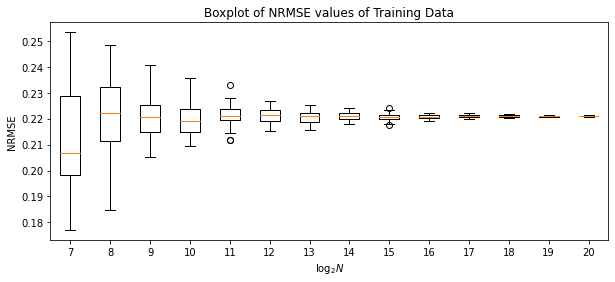

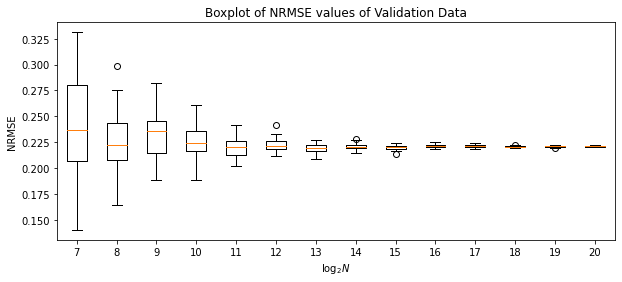

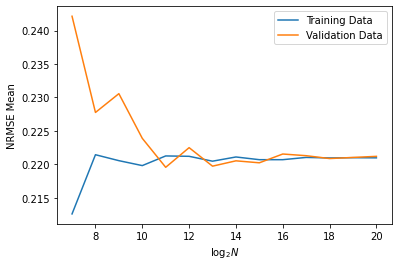

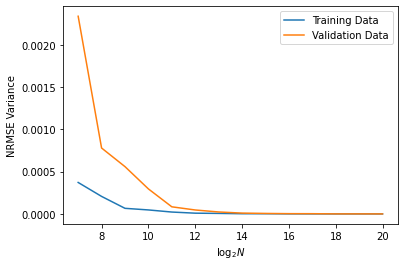

In [14]:
# set constant feature dimension and weights
feature_dim = 8
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5

# initialize empty arrays to collect the nrmse data
# and corresponding sample size
nrmse_train_array = []
nrmse_val_array = []
n_samples_array = []

# for loop with increasing number of samples in each iteration
for i in range(7, 21):
    
    n = 2**i
    
    # initialize empty arrays to collect nrmse values for specific sample size
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same sample size
    for j in range(5, 35):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, 0)[0]

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific sample size
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append sample size to the n_sample_array
    n_samples_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = n_samples_array)
plt.xlabel("$\log_2 N$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = n_samples_array)
plt.xlabel("$\log_2 N$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(n_samples_array, nrmse_train_mean)
plt.plot(n_samples_array, nrmse_val_mean)
plt.xlabel("$\log_2 N$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(n_samples_array, nrmse_train_var)
plt.plot(n_samples_array, nrmse_val_var)
plt.xlabel("$\log_2 N$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

We see that with increasing sample size N, the mean value of NRMSE stays nearly the same for training data while it decreases for validation data. For lower values, the training NRMSE values are far greater and have far more variance compared to higher values of N. This is due to underfitting of the model given the less data. At higher sample sizes, we would expect overfitting and that validation error increases, but this doesn't happen because of the very similar values drawn from the Gaussian IIDs between the training and validation data at such huge sample sizes.

#### b)

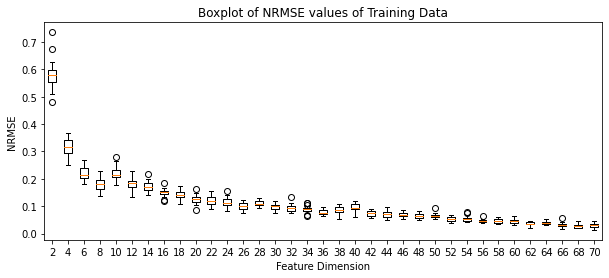

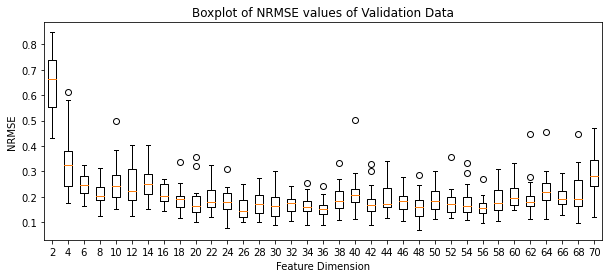

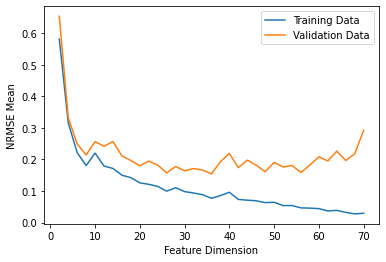

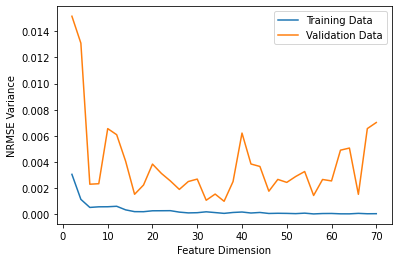

In [18]:
# set sample size
n_sample = 80

# initialize empty arrays to collect the nrmse data
# and corresponding feature dimension
nrmse_train_array = []
nrmse_val_array = []
featdim_array = []

# for loop with increasing feature dimension in each iteration
for i in range(2, 71, 2):
    
    # initialize weights for feature dimension = i
    w_ideal = (np.random.rand(i+1) - 0.5)*5    # range: -2.5 to 2.5
    
    # initialize empty arrays to collect nrmse values for specific feature dimension
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same feature dimension
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, i)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), i)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, 0)[0]

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific sample size
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append feature dimension to the corresponding array
    featdim_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = featdim_array)
plt.xlabel("Feature Dimension")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = featdim_array)
plt.xlabel("Feature Dimension")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(featdim_array, nrmse_train_mean)
plt.plot(featdim_array, nrmse_val_mean)
plt.xlabel("Feature Dimension")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(featdim_array, nrmse_train_var)
plt.plot(featdim_array, nrmse_val_var)
plt.xlabel("Feature Dimension")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

We see that with increasing feature dimension, the mean value and variance of NRMSE for training data decreases, which indicates better fitting for training data. But in case of validation data, initially the values do decrease, which indicate better fitting, but then they start increasing indicating a poor fit. This indicates that at lower feature dimension, the model was underfit, whereas at higher feature dimension, the model is overfitting.

#### c)

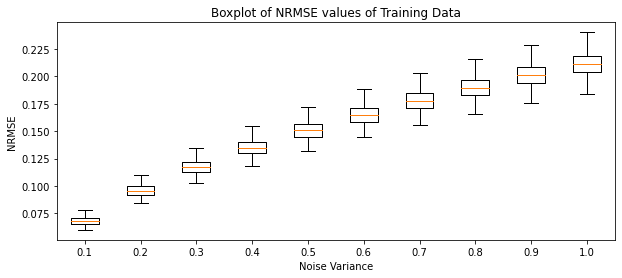

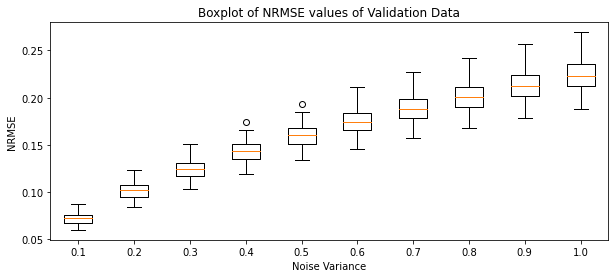

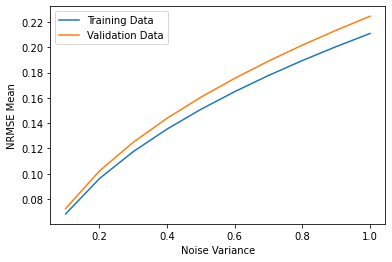

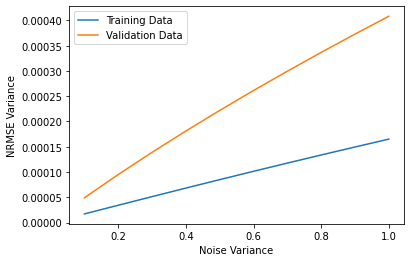

In [19]:
# set sample size, feature dimension, and weights
n_sample = 250
feat_dim = 10
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding noise variance
nrmse_train_array = []
nrmse_val_array = []
noise_var_array = []

# for loop with increasing noise variance in each iteration
for i in range(1,11):
    
    # initialize empty arrays to collect nrmse values for specific feature dimension
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same feature dimension
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feat_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], i/10)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feat_dim)        
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], i/10)

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, 0)[0]

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific sample size
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append noise variance to the corresponding array
    noise_var_array.append(i/10)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(noise_var_array, nrmse_train_mean)
plt.plot(noise_var_array, nrmse_val_mean)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(noise_var_array, nrmse_train_var)
plt.plot(noise_var_array, nrmse_val_var)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

The average NRMSE values keep increasing with noise variance, and are nearly zero at low values of noise variance. This can easily be explained by the fact that with zero noise, we can basically get an exactly linear fit to the model since $t=Xw$. And as we add some amount of Gaussian noise to the target values, the data points deviate from this linear fit and the error increases.

#### d)

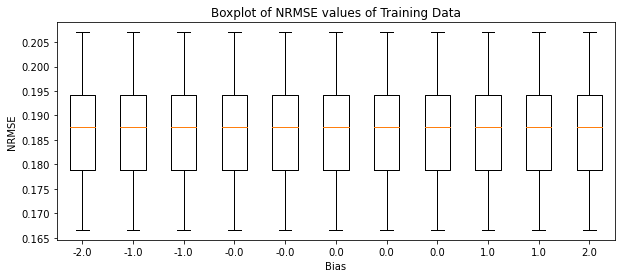

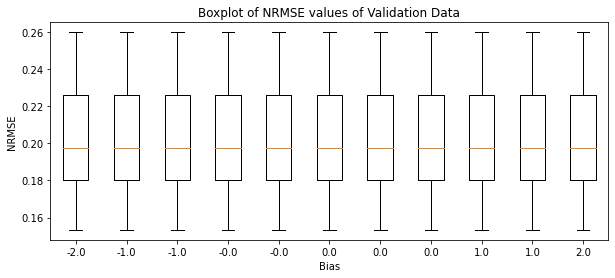

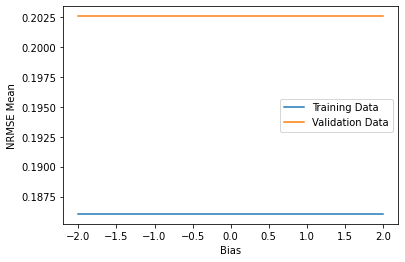

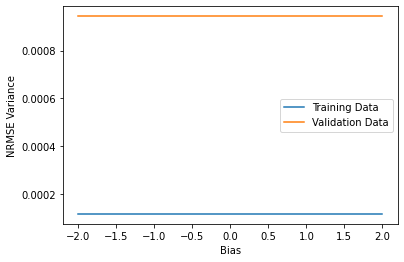

In [20]:
# set sample size, feature dimension, and weights
n_sample = 250
feat_dim = 10
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding bias
nrmse_train_array = []
nrmse_val_array = []
bias_array = []

# for loop with increasing bias in each iteration
for i in range(-5,6):
    
    # setting bias, range: -2 to 2
    w_ideal[0] = i*0.4
    
    # initialize empty arrays to collect nrmse values for specific feature dimension
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same feature dimension
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feat_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feat_dim)        
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        # w_est[0] = w_ideal[0]
        w_est = weight_estimate(X_train, tar_train, 0)[0]

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific sample size
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append noise variance to the corresponding array
    # np.trunc() to limit the variable to 1 decimal point
    # used it to avoid the unnecessary
    bias_array.append(np.trunc(w_ideal[0]*10/10))

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = bias_array)
plt.xlabel("Bias")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = bias_array)
plt.xlabel("Bias")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(bias_array, nrmse_train_mean)
plt.plot(bias_array, nrmse_val_mean)
plt.xlabel("Bias")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(bias_array, nrmse_train_var)
plt.plot(bias_array, nrmse_val_var)
plt.xlabel("Bias")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

The plots indicate that the NRMSE values are independent of the bias we use to get the target values. This is because the NRMSE values depend on the noise that we add to $Xw$.  
$Y=Xw$ gives us a set of data points that form a straight line n dimensions. Adding noise to these values will make them deviate from this staright line and increase error. Now the linear regressoin model would've given perfect weights to exactly fit the data points if there was no noise, this is independent of the bias. But the noise would basically cause the model to output weights that are close to the ideal weights, but account for the noise. This is also visible in the plots for the previous part against noise variance. Therefore, it makes sense to reason that NRMSE value depends on the noise variance and not on the bias.

#### e)

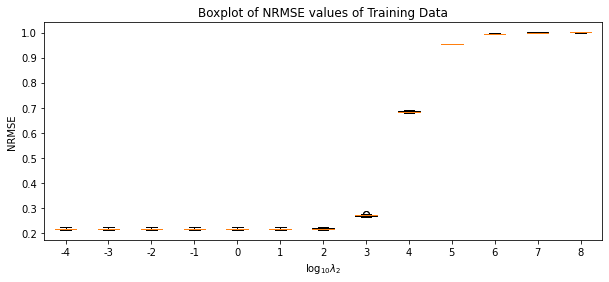

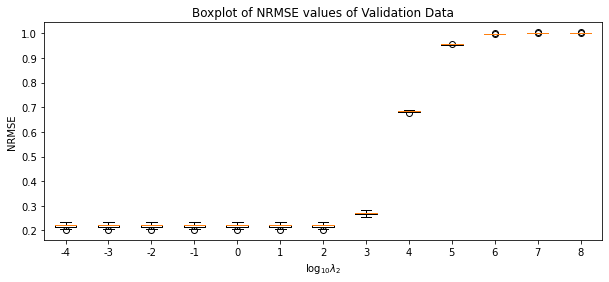

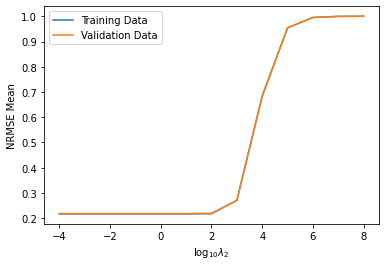

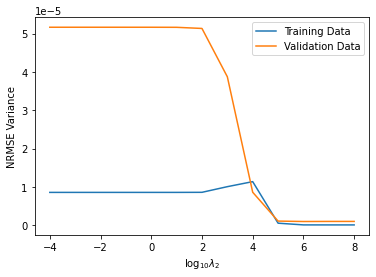

In [24]:
# set sample size, feature dimension, and weights
n_sample = 5000
feat_dim = 10
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding lambda2 value
nrmse_train_array = []
nrmse_val_array = []
lmda2_array = []

# for loop with increasing bias in each iteration
for i in range(-4, 9):
    
    lmda2 = 10**i
    
    # initialize empty arrays to collect nrmse values for specific feature dimension
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same feature dimension
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feat_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feat_dim)        
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, lmda2)[0]

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific sample size
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append noise variance to the corresponding array
    lmda2_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = lmda2_array)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = lmda2_array)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(lmda2_array, nrmse_train_mean)
plt.plot(lmda2_array, nrmse_val_mean)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(lmda2_array, nrmse_train_var)
plt.plot(lmda2_array, nrmse_val_var)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

For lower values of $\lambda_2$, the value is so low that it is negligible as compared to the MSE error term in the loss function, and thus has nearly zero effect on the NRMSE value upto a certain point.  
When regularization takes effect, it tries to reduce the overfitting of data, and thus, the error increases, as observed in the plots above.  
At really high values of $\lambda_2$, the MSE term of loss term is negligible as compared to the regularization term of $\dfrac{\lambda_2}{2}w^Tw$, and minimizing this loss function leads to nearly zero weights. Therefore, the NRMSE value would be:
$$\dfrac{\sqrt{\dfrac{\sum_{i=1}^N (t_i-w^Tx_i)^2}{N}}}{\sigma(t)} = \dfrac{\sqrt{\dfrac{\sum_{i=1}^N t_i^2}{N}}}{\sigma(t)}$$
which is equal to 1, as observed in the plots above.

#### f)

RAM capacity reached at sample size =  1000000000
RAM capacity reached at feature dimension =  100000


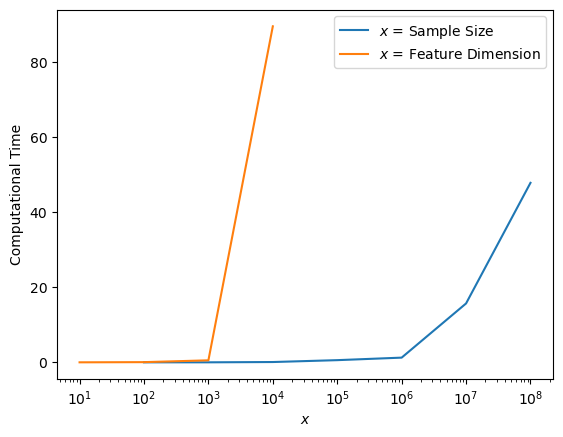

In [15]:
'EXPERIMENT 1: Time taken vs sample size'

# set sample size, feature dimension, weights, and lambda_2
n_sample = 100
feat_dim = 8
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5
lmda2 = 1000

# initialize empty array to collect n_sample value and time taken
n_sample_array = []
time_array_n = []

# while loop with increasing n_sample in each iteration
while True:
    
    try:
        
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feat_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feat_dim)        
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

        # CPU processing start time
        st = time.process_time()

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, lmda2)[0]

        # CPU processing end time
        et = time.process_time()

        # net time taken for CPU to carry out weight_estimate function
        time_taken = et - st

        # append sample size and time taken to corresponding arrays
        n_sample_array.append(n_sample)
        time_array_n.append(time_taken)
    
    # exception handling of Memory Error, i.e., when RAM is at capacity
    except MemoryError:
        print("RAM capacity reached at sample size = ", n_sample)
        break
    
    # increase sample size by a factor of 10
    n_sample *= 10


'EXPERIMENT 2: Time taken vs feature dimension'
    
# set sample size, lambda_2, and feature dimension
n_sample = 5000
lmda2 = 1000
feat_dim = 10

# initialize empty array to collect feat_dim value and time taken
feat_dim_array = []
time_array_fd = []

# while loop with increasing feature dimension in each iteration
while True:
    
    # initialize weights
    w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5
    
    try:
        
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feat_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feat_dim)        
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

        # CPU processing start time
        st = time.process_time()

        # compute weight estimate through pseudoinverse method
        # [0] index to just get the weight from the (w, mse, y) tuple
        # returned by weight_estimate function
        w_est = weight_estimate(X_train, tar_train, lmda2)[0]

        # CPU processing end time
        et = time.process_time()

        # net time taken for the CPU to carry out the weight_estimate function
        time_taken = et - st

        # append feature dimension and time taken to corresponding arrays
        feat_dim_array.append(feat_dim)
        time_array_fd.append(time_taken)
    
    # exception handling of Memory Error, i.e., when RAM is at capacity
    except MemoryError:
        print("RAM capacity reached at feature dimension = ", feat_dim) 
        break
    
    # increase feature dimension by a factor of 10
    feat_dim *= 10
    

# plot time vs sample size and feature dimension
fig1 = plt.figure()
plt.plot(n_sample_array, time_array_n)
plt.plot(feat_dim_array, time_array_fd)
plt.xscale("log")
plt.xlabel("$x$")
plt.ylabel("Computational Time")
plt.legend(["$x$ = Sample Size", "$x$ = Feature Dimension"])
plt.show()

Through the function time.process_time(), we can directly measure the CPU execution time of the program or lines of code. time.process_time() basically measures only the time spent by the CPU in carrying out computations in the code. Also, after more research on this, I figured that for the purpose of this question, timeit can be used too. But it probably would take much more time to run the cell again, since timeit would basically run the code snippet multiple times and calculates best value of computation time given the mean and variance of the multiple runs. To actually see a slight difference, I would have to have timeit run the code snippets hundreds or thousands of times, which would take many hours. And considering that we probably won't need that level of accuracy, I concluded time.process_time() should suffice for this experiment.

As observed from the plot above, on a logarithmic scale of number of samples, the computation time is mostly linear, but deviates from linearity by a huge margin after $n_{sample} = 10^7$. It is almost similar in case of feature dimensions, except that it goes nonlinear at about $10^3$ dimensions.

When variable are created in a program, they're basically using memory from the RAM of the device. When these variables are so huge that the RAM cannot store them, Python returns the error called MemoryError. In case of this, we know that max RAM capacity is reached, and thus I've implemented the try-except to return the sample size or feature dimension at which this event takes place.

References:  
https://pynative.com/python-get-execution-time-of-program/ - time.process_time()  
https://rollbar.com/blog/python-memoryerror/ - MemoryError  
https://www.w3schools.com/python/python_try_except.asp - try and except  
https://www.webucator.com/article/python-clocks-explained/ - Python Clocks  

#### g)

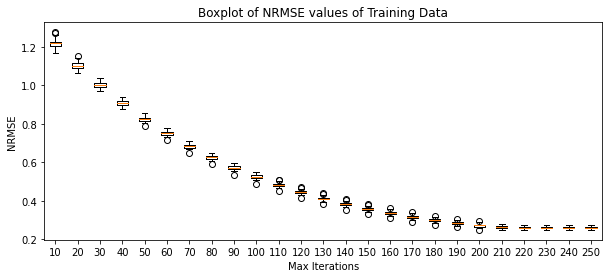

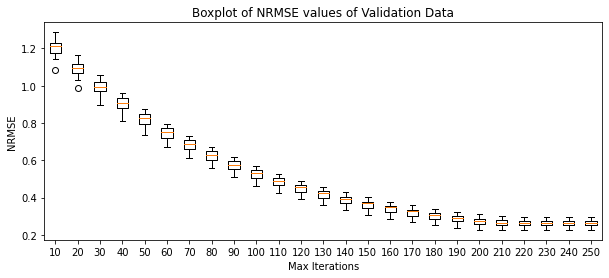

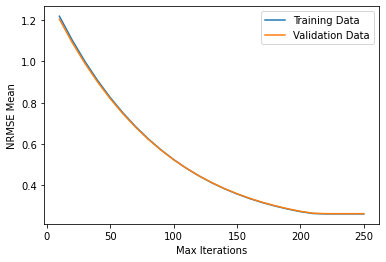

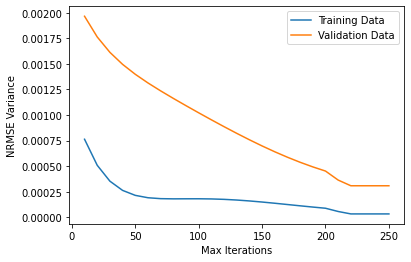

In [32]:
# set sample size, feature dimension, eta, and weights
n_sample = 1000
feature_dim = 10
eta = 10**(-5)
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding max_iter
nrmse_train_array = []
nrmse_val_array = []
max_iter_array = []

# for loop with increasing max_iter of gradient descent
for i in range(10, 251, 10):
    
    # initialize empty arrays to collect nrmse values for specific max_iter
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same max_iter
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through gradient descent
        # min_change_NRMSE used here is 0.01
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, i, 0.001)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific max_iter
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append max_iter to max_iter_array
    max_iter_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = max_iter_array)
plt.xlabel("Max Iterations")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = max_iter_array)
plt.xlabel("Max Iterations")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(max_iter_array, nrmse_train_mean)
plt.plot(max_iter_array, nrmse_val_mean)
plt.xlabel("Max Iterations")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(max_iter_array, nrmse_train_var)
plt.plot(max_iter_array, nrmse_val_var)
plt.xlabel("Max Iterations")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

As expected, provided a decent learning rate $\eta$, lower number of max iterations would be insufficient number of steps for the gradient descent to converge to the optimum weights. And after a certain number of max iterations, the steps are enough that it does converge to the optimum weights before the max_iter is reached, and thus the NRMSE value stays constant.

#### h)

<ipython-input-8-3b597babe7ee>:8: RuntimeWarning: overflow encountered in double_scalars
  mse += 0.5*(y[i] - t[i])**2
<ipython-input-16-c4569e54405c>:57: RuntimeWarning: invalid value encountered in double_scalars
  if abs(nrmse_old - nrmse_new) < min_change_NRMSE:
<ipython-input-11-15511d1c4ceb>:4: RuntimeWarning: overflow encountered in matmul
  wt_w = np.matmul(w[1:].transpose(), w[1:])
<ipython-input-16-c4569e54405c>:34: RuntimeWarning: overflow encountered in double_scalars
  rmse = np.sqrt(mean_se(y, t)*2/y.size)
C:\Users\shrey\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


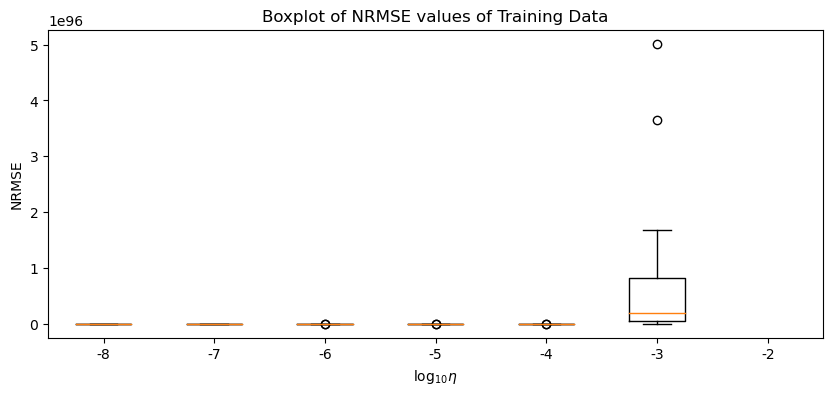

C:\Users\shrey\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


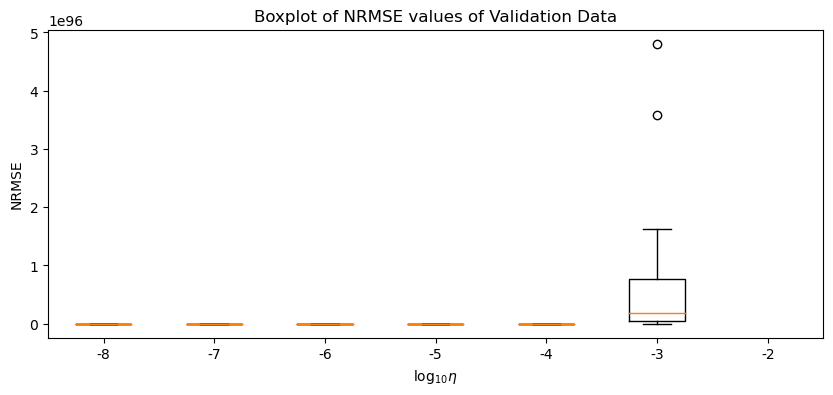

C:\Users\shrey\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


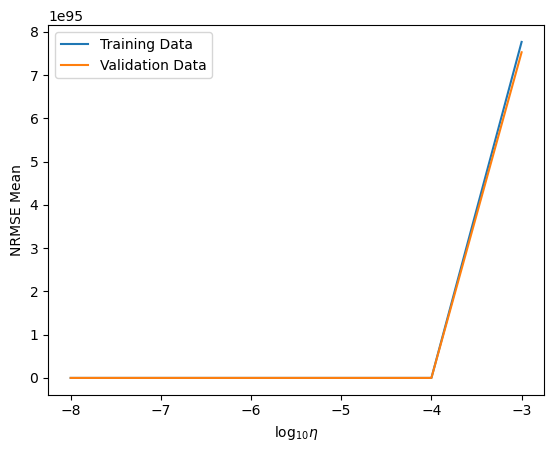

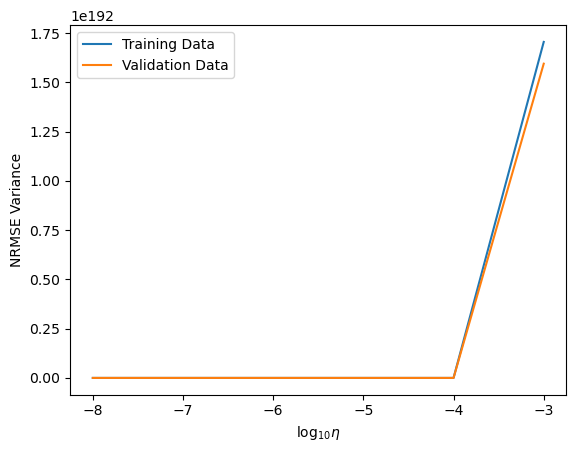

In [ ]:
# set sample size, feature dimension, eta, and weights
n_sample = 5000
feature_dim = 8
max_iter = 150
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding max_iter
nrmse_train_array = []
nrmse_val_array = []
eta_array = []

# for loop with increasing eta of gradient descent
for i in range(-8,-1):
    
    eta = 10**i
    
    # initialize empty arrays to collect nrmse values for specific eta
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same eta
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through gradient descent
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific eta
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append eta to max_iter_array
    eta_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = eta_array)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = eta_array)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(eta_array, nrmse_train_mean)
plt.plot(eta_array, nrmse_val_mean)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(eta_array, nrmse_train_var)
plt.plot(eta_array, nrmse_val_var)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

From the above plots, we see that NRMSE values are nearly zero until $\eta = 10^{-4}$, after which is suddenly grows exponentially to extreme values. This is an indication that the learning rate $\eta$ of $10^{-3}$ is just too high for the gradient descent method and it causes the weights to fluctuate a lot and never converge.  
Another observation from the RuntimeWarning is that for $\eta = 10^{-2}$, the computed values of some of the variables are so large that the default data types assigned to the variables are overflowing, and thus cannot be computed.

Due to the extrememly high values of NRMSE mean and variance at $\eta = 10^{-3}$, we cannot compare the close to zero values of the same parameters for lower eta. This gives us the reason to run the above code again upto $\eta = 10^{-4}$.

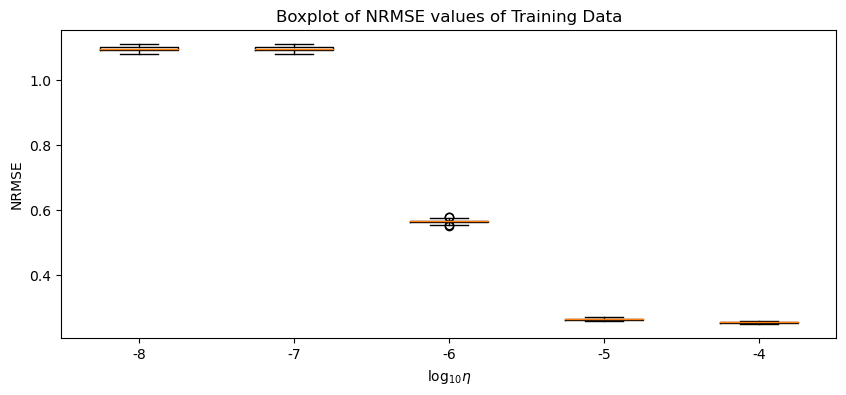

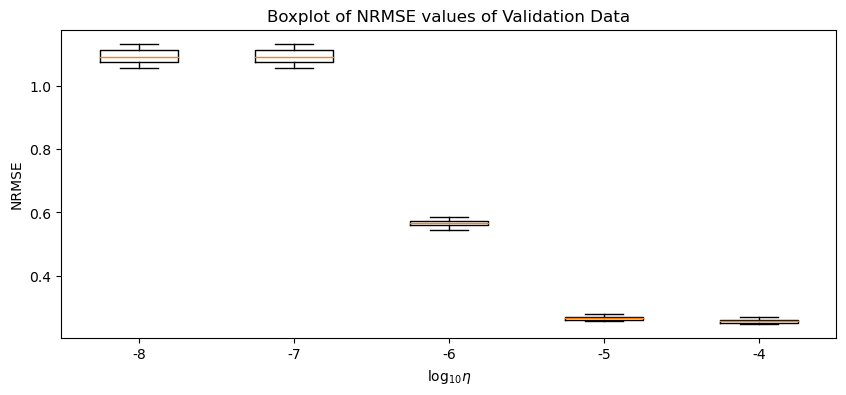

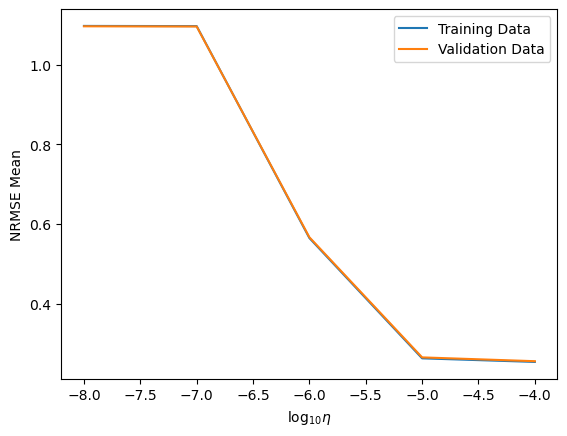

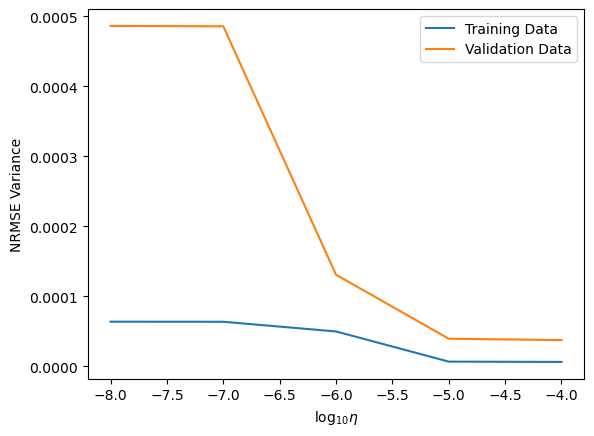

In [ ]:
'Repeat of the above code for eta upto 10^(-4), to analyze the variation of NRMSE values for lower eta values'

# set sample size, feature dimension, eta, and weights
n_sample = 5000
feature_dim = 8
max_iter = 150
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding max_iter
nrmse_train_array = []
nrmse_val_array = []
eta_array = []

# for loop with increasing eta of gradient descent,
# with log_{10}(eta) going from -8 to -4 (including -4)
for i in range(-8,-3):
    
    eta = 10**i
    
    # initialize empty arrays to collect nrmse values for specific eta
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same eta
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through gradient descent
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific eta
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append eta to max_iter_array
    eta_array.append(i)

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = eta_array)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = eta_array)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(eta_array, nrmse_train_mean)
plt.plot(eta_array, nrmse_val_mean)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(eta_array, nrmse_train_var)
plt.plot(eta_array, nrmse_val_var)
plt.xlabel("$\log_{10} \eta$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

In the above plots we see that for $-8 < \log_{10} \eta < -6$, the NRMSE values are pretty high. But these values also decrease monotonically upto $\log_{10} \eta = -4$. This can be attributed to the fact that with very low learning rates, the gradient descent is so slow that it never comes close to converging to the optimal weights, but as we increase the learning rate, it starts getting closer to the optimal weights. And after a certain value of $\eta$, it starts diverging again by overshooting across the optimal weights. This was observed in the earlier plots where we even varied $\eta$ from 0.00001 to 0.01. Thus, there exists a sweet range of numbers for the learning rate where the gradient descent does converge to optimal weights.

#### i)

In [ ]:
'EXPERIMENT 1: At what sample size does the program crash?'

# set sample size, feature dimension, eta, max_iter, and weights
n_sample = 100
feat_dim = 8
eta = 10**(-7)
max_iter = 150
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

# while loop with increasing n_sample in each iteration
while True:
        
    print("Starting iteration for sample size =", n_sample)

    # define traning dataset X_train
    X_train = data_matrix(n_sample, feat_dim)

    # define target data for training dataset
    tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

    # define validation dataset X_val and its target values
    X_val = data_matrix(int(n_sample/5), feat_dim)        
    tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

    # compute weight estimate through gradient descent
    # [0] index to just get the weight from the (w, nrmse) tuple
    # returned by w_est_graddes function
    w_est = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)[0]
    
    print("Completed iteration for sample size =", n_sample)
    # increase sample size by a factor of 10
    n_sample *= 10

Starting iteration for sample size = 100
Completed iteration for sample size = 100
Starting iteration for sample size = 1000
Completed iteration for sample size = 1000
Starting iteration for sample size = 10000
Completed iteration for sample size = 10000
Starting iteration for sample size = 100000
Completed iteration for sample size = 100000
Starting iteration for sample size = 1000000
Completed iteration for sample size = 1000000
Starting iteration for sample size = 10000000
Completed iteration for sample size = 10000000
Starting iteration for sample size = 100000000


The computations were taking an extremely long time running on my laptop, so I switched to Colab. Here, colab session crashed during the gradient descent for sample size N = 100 Million after using all available RAM. Thus, the breaking point is N = 100 Million. We can run the above loop again till N = 10 Million and see the computation time.

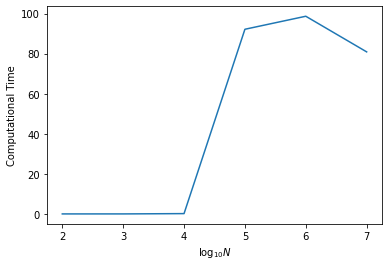

In [16]:
'Time taken vs sample size'

# set feature dimension, eta, max_iter, and weights
feat_dim = 8
eta = 10**(-7)
max_iter = 250
w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty array to collect n_sample value and time taken
n_sample_array = []
time_array_n = []

# while loop with increasing n_sample in each iteration
for i in range(2,8):

    n_sample = 10**i

    # define traning dataset X_train
    X_train = data_matrix(n_sample, feat_dim)

    # define target data for training dataset
    tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

    # define validation dataset X_val and its target values
    X_val = data_matrix(int(n_sample/5), feat_dim)        
    tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

    # CPU processing start time
    st = time.process_time()

    # compute weight estimate through gradient descent
    # [0] index to just get the weight from the (w, nrmse) tuple
    # returned by w_est_graddes function
    w_est = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)[0]

    # CPU processing end time
    et = time.process_time()

    # net time taken for CPU to carry out weight_estimate function
    time_taken = et - st

    # append sample size and time taken to corresponding arrays
    n_sample_array.append(i)
    time_array_n.append(time_taken)

# plot time vs sample size
fig = plt.figure()
plt.plot(n_sample_array, time_array_n)
plt.xlabel("$\log_{10} N$")
plt.ylabel("Computational Time")
plt.show()

Clearly, the computational time varies non-linearly when we vary N exponentially.

In [ ]:
'EXPERIMENT 2: At what feature dimension does the program crash?'
    
# set sample size, feature dimension, eta, and max_iter
n_sample = 2500
feat_dim = 10
eta = 10**(-7)
max_iter = 125

# while loop with increasing feature dimension in each iteration
while True:
    
    # initialize weights
    w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5
        
    print("Started iteration for feature dimension =", feat_dim)

    # define traning dataset X_train
    X_train = data_matrix(n_sample, feat_dim)

    # define target data for training dataset
    tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

    # define validation dataset X_val and its target values
    X_val = data_matrix(int(n_sample/5), feat_dim)        
    tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

    # compute weight estimate through gradient descent
    # [0] index to just get the weight from the (w, mse) tuple
    # returned by w_est_graddes function
    w_est = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)[0]
    
    print("Completed iteration for feature dimension =", feat_dim)
    # increase feature dimension by a factor of 10
    feat_dim *= 10

Started iteration for feature dimension = 10
Completed iteration for feature dimension = 10
Started iteration for feature dimension = 100
Completed iteration for feature dimension = 100
Started iteration for feature dimension = 1000
Completed iteration for feature dimension = 1000
Started iteration for feature dimension = 10000
Completed iteration for feature dimension = 10000
Started iteration for feature dimension = 100000
Completed iteration for feature dimension = 100000
Started iteration for feature dimension = 1000000


Colab session crashed during the gradient descent for feature dimension D = 1 Million after using all available RAM. Thus, the breaking point is D = 1 Million. We can run the above loop again till D = 100,000 and see the computation time.

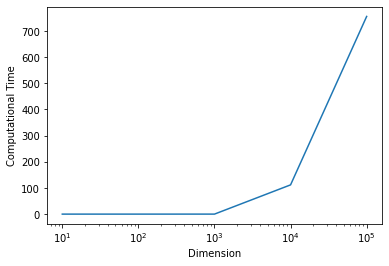

In [21]:
'EXPERIMENT 2: At what feature dimension does the program crash?'
    
# set sample size, feature dimension, eta, and max_iter
n_sample = 2500
eta = 10**(-7)
max_iter = 250

# initialize empty array to collect feat_dim value and time taken
feat_dim_array = []
time_array_fd = []

# while loop with increasing feature dimension in each iteration
for i in range(1, 6):
    
    feat_dim = 10**i

    # initialize weights
    w_ideal = (np.random.rand(feat_dim+1) - 0.5)*5    # range: -2.5 to 2.5

    # define traning dataset X_train
    X_train = data_matrix(n_sample, feat_dim)

    # define target data for training dataset
    tar_train = target(X_train, w_ideal[1:], w_ideal[0], 0.8)

    # define validation dataset X_val and its target values
    X_val = data_matrix(int(n_sample/5), feat_dim)        
    tar_val = target(X_val, w_ideal[1:], w_ideal[0], 0.8)

    # CPU processing start time
    st = time.process_time()

    # compute weight estimate through gradient descent
    # [0] index to just get the weight from the (w, mse) tuple
    # returned by w_est_graddes function
    w_est = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001)[0]

    # CPU processing end time
    et = time.process_time()

    # net time taken for the CPU to carry out the weight_estimate function
    time_taken = et - st

    # append feature dimension and time taken to corresponding arrays
    feat_dim_array.append(feat_dim)
    time_array_fd.append(time_taken)  

# plot time vs feature dimension
fig = plt.figure()
plt.plot(feat_dim_array, time_array_fd)
plt.xscale("log")
plt.xlabel("Dimension")
plt.ylabel("Computational Time")
plt.show()

Clearly, the computational time varies non-linearly when we vary feature dimension D exponentially.

#### k)

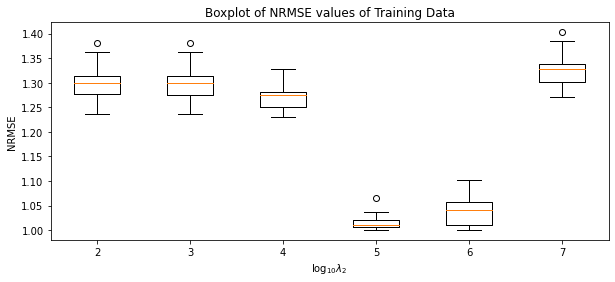

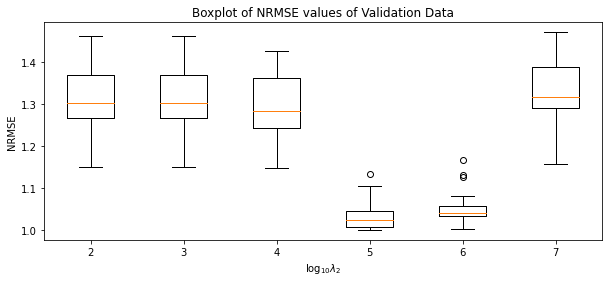

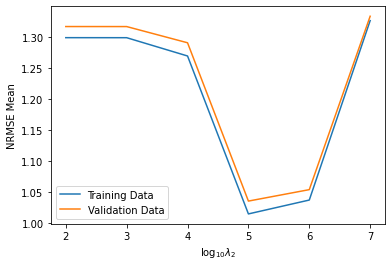

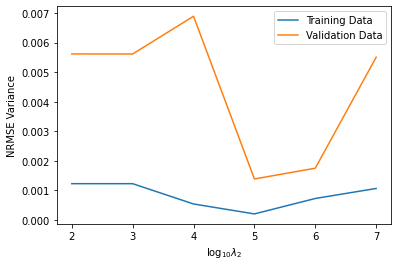

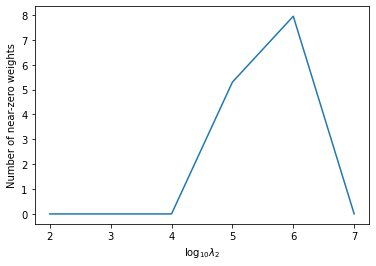

In [23]:
# set sample size, feature dimension, max_iter, eta, and weights
n_sample = 250
feature_dim = 50
max_iter = 250
eta = 10**(-6)
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding lambda_2 and average near-zero weights
nrmse_train_array = []
nrmse_val_array = []
lmda2_array = []
near_zero_w = []

# for loop with increasing lmda2 of gradient descent
for i in range(2,8):
    
    # lambda_2 value, in the orders of 10^
    lmda2_graddes = 10**i
    
    # initialize empty arrays to collect nrmse values and near-zero weights for specific lmda2
    nrmse_ta_i = []
    nrmse_va_i = []
    nzero_w = []
    
    # for loop with varying seed, to run multiple experiments on same lmda2
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through gradient descent
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001, lmda2 = lmda2_graddes)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
        
        # computing number of non-zero weights in w
        n_nzero_weights = 0
        for w in w_est:
            if w**2 < 0.0001:
                n_nzero_weights += 1
        nzero_w.append(n_nzero_weights)
    
    # append nrmse values list of the iteration-specific eta
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append log(lmda2) to lmda2_array
    lmda2_array.append(i)
    
    # append average number of near-zero weights for specific lmda2
    near_zero_w.append(np.mean(nzero_w))

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = lmda2_array)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = lmda2_array)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(lmda2_array, nrmse_train_mean)
plt.plot(lmda2_array, nrmse_val_mean)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(lmda2_array, nrmse_train_var)
plt.plot(lmda2_array, nrmse_val_var)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot average number of near-zero weights wrt log(lmda2)
fig5 = plt.figure()
plt.plot(lmda2_array, near_zero_w)
plt.xlabel("$\log_{10} \lambda _2$")
plt.ylabel("Number of near-zero weights")
plt.show()

From the above plots, the optimal $\lambda_2$ values appear to be about $10^5$ and $10^6$ for the given number of samples, feature dimensions, learning rate eta, and max iterations. As for why NRMSE value suddenly peaked again at $\lambda_2 = 10^7$, it's probably because the iterations weren't enough to get the loss function low enough.

#### l)

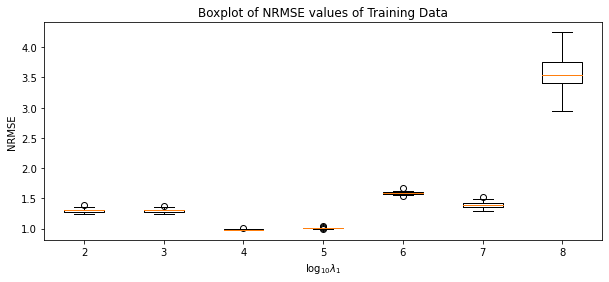

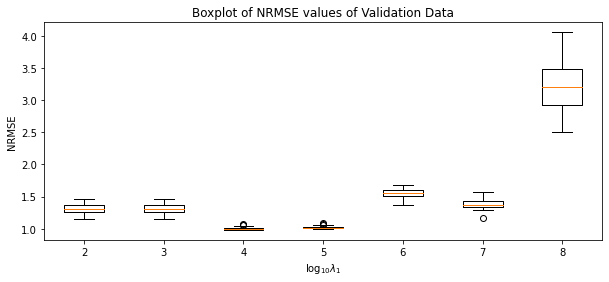

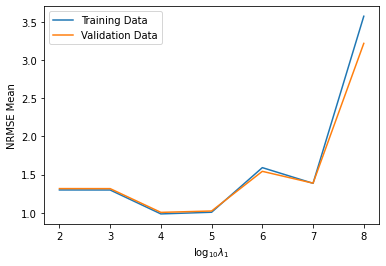

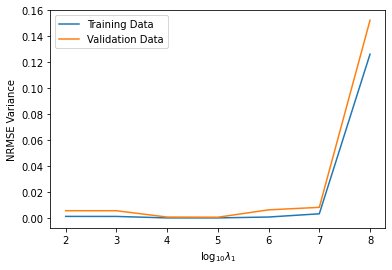

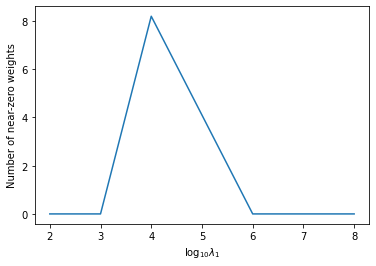

In [24]:
# set sample size, feature dimension, max_iter, eta, and weights
n_sample = 250
feature_dim = 50
max_iter = 250
eta = 10**(-6)
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding lambda_1 and average near-zero weights
nrmse_train_array = []
nrmse_val_array = []
lmda1_array = []
near_zero_w = []

# for loop with increasing lmda1 of gradient descent
for i in range(2,9):
    
    # lambda_1 value, in the orders of 10^
    lmda1_graddes = 10**i
    
    # initialize empty arrays to collect nrmse values and near-zero weights for specific lmda1
    nrmse_ta_i = []
    nrmse_va_i = []
    nzero_w = []
    
    # for loop with varying seed, to run multiple experiments on same lmda1
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], 1.0)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], 1.0)

        # compute weight estimate through gradient descent
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001, lmda1 = lmda1_graddes)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_train = n_rmse(X_train, w_est, tar_train)
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
        
        # counting number of near-zero weights in w vector and appending the value
        n_nzero_weights = 0
        for w in w_est:
            if w**2 < 0.0001:
                n_nzero_weights += 1
        nzero_w.append(n_nzero_weights)
    
    # append nrmse values list of the iteration-specific eta
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append log(lmda1) to lmda1_array
    lmda1_array.append(i)
    
    # append average number of near-zero weights for specific lmda1
    near_zero_w.append(np.mean(nzero_w))

# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = lmda1_array)
plt.xlabel("$\log_{10} \lambda _1$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = lmda1_array)
plt.xlabel("$\log_{10} \lambda _1$")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(lmda1_array, nrmse_train_mean)
plt.plot(lmda1_array, nrmse_val_mean)
plt.xlabel("$\log_{10} \lambda _1$")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(lmda1_array, nrmse_train_var)
plt.plot(lmda1_array, nrmse_val_var)
plt.xlabel("$\log_{10} \lambda _1$")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot average number of near-zero weights wrt log(lmda1)
fig5 = plt.figure()
plt.plot(lmda1_array, near_zero_w)
plt.xlabel("$\log_{10} \lambda _1$")
plt.ylabel("Number of near-zero weights")
plt.show()

The optimal $\lambda_1$ value appears to be $10^4$ since the NRMSE value is acceptable enough and low, while the number of near-zero weights is high too.

#### m)

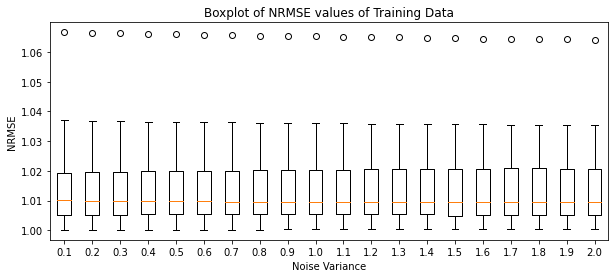

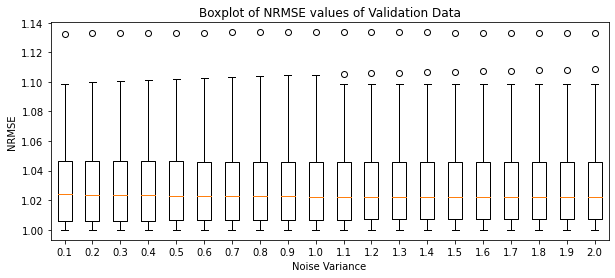

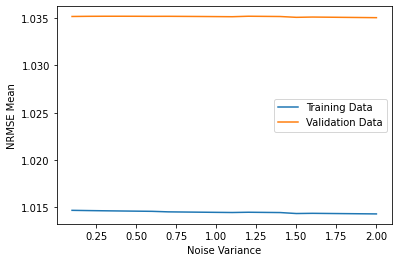

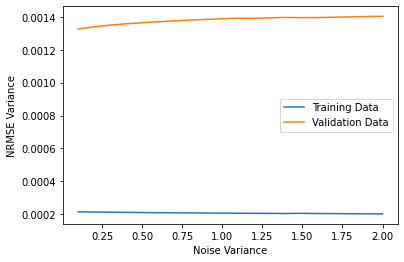

In [25]:
# set sample size, feature dimension, max_iter, eta, lambda_2, and weights
n_sample = 250
feature_dim = 50
max_iter = 250
eta = 10**(-6)
lmda2_graddes = 10**5
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding noise variance
nrmse_train_array = []
nrmse_val_array = []
noise_var_array = []

# for loop with increasing noise variance
for i in range(1, 21):
    
    # value of noise variance
    noise_variance = i/10
    
    # initialize empty arrays to collect nrmse values for specific noise_var
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same noise_var
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], noise_variance)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], noise_variance)

        # compute weight estimate through gradient descent and corresponding nrmse_train
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001, lmda2 = lmda2_graddes)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific noise variance
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append noise variance to array
    noise_var_array.append(i/10)
    
# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(noise_var_array, nrmse_train_mean)
plt.plot(noise_var_array, nrmse_val_mean)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(noise_var_array, nrmse_train_var)
plt.plot(noise_var_array, nrmse_val_var)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

NRMSE value is nearly independent of the noise variance. This is probablyl because the gradient descent algorithm at the optimal regularization parameter is good enough to provide an optimal weight such that the effect of noise variance is nearly zero.

#### n)

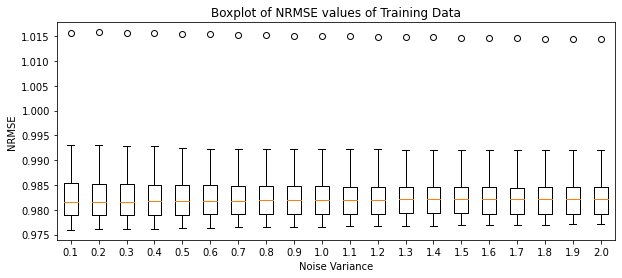

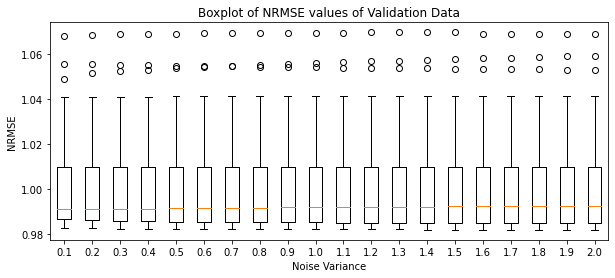

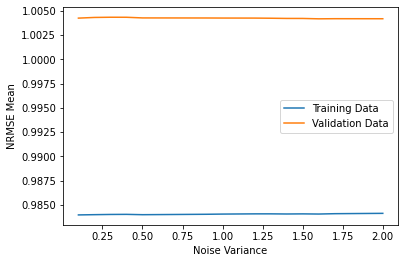

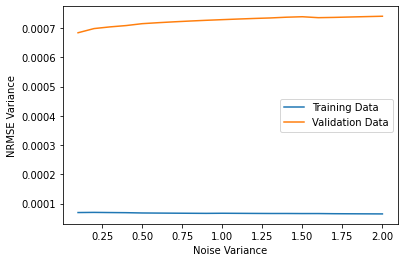

In [26]:
# set sample size, feature dimension, max_iter, eta, lambda_1, and weights
n_sample = 250
feature_dim = 50
max_iter = 250
eta = 10**(-6)
lmda1_graddes = 10**4
w_ideal = (np.random.rand(feature_dim + 1) - 0.5)*5    # range: -2.5 to 2.5

# initialize empty arrays to collect the nrmse data
# and corresponding noise variance
nrmse_train_array = []
nrmse_val_array = []
noise_var_array = []

# for loop with increasing noise variance
for i in range(1, 21):
    
    # value of noise variance
    noise_variance = i/10
    
    # initialize empty arrays to collect nrmse values for specific noise_var
    nrmse_ta_i = []
    nrmse_va_i = []
    
    # for loop with varying seed, to run multiple experiments on same noise_var
    for j in range(5, 25):
        
        # we need to reset np.random to the specific seed each time before calling
        # the random function to get the data corresponding to that particular seed
        
        # np.random.seed(j) sets seed=j for the next time np.random is called
        np.random.seed(j)
        # define traning dataset X_train
        X_train = data_matrix(n_sample, feature_dim)

        # define target data for training dataset
        tar_train = target(X_train, w_ideal[1:], w_ideal[0], noise_variance)

        # define validation dataset X_val and its target values
        X_val = data_matrix(int(n_sample/5), feature_dim)
        tar_val = target(X_val, w_ideal[1:], w_ideal[0], noise_variance)

        # compute weight estimate through gradient descent and corresponding nrmse_train
        # min_change_NRMSE used here is 0.001
        w_est, nrmse_train = w_est_linreg_graddes(X_train, tar_train, eta, max_iter, 0.001, lmda1 = lmda1_graddes)

        # compute nrmse values for training and validation datasets given w_est
        nrmse_val = n_rmse(X_val, w_est, tar_val)

        # append nrmse values to respective lists
        nrmse_ta_i.append(nrmse_train)
        nrmse_va_i.append(nrmse_val)
    
    # append nrmse values list of the iteration-specific noise variance
    # to the corresponding lists, forming a nested list
    nrmse_train_array.append(nrmse_ta_i)
    nrmse_val_array.append(nrmse_va_i)
    
    # append noise variance to array
    noise_var_array.append(i/10)
    
# define a figure for plotting, with size (10,4)
fig1 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for training set and show plot
plt.boxplot(nrmse_train_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Training Data")
plt.show()

# define a figure for plotting, with size (10,4)
fig2 = plt.figure(figsize = (10,4))

# create a boxplot of nrmse values obtained for validation set and show plot
plt.boxplot(nrmse_val_array, labels = noise_var_array)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.title("Boxplot of NRMSE values of Validation Data")
plt.show()

# create arrays of means and variances of the nrmse datasets for training and validation data
nrmse_train_mean = np.mean(nrmse_train_array, axis=1)
nrmse_val_mean = np.mean(nrmse_val_array, axis=1)
nrmse_train_var = np.var(nrmse_train_array, axis=1)
nrmse_val_var = np.var(nrmse_val_array, axis=1)

# plot means of nrmse training and validation datasets
fig3 = plt.figure()
plt.plot(noise_var_array, nrmse_train_mean)
plt.plot(noise_var_array, nrmse_val_mean)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Mean")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

# plot variances of nrmse training and validation datasets
fig4 = plt.figure()
plt.plot(noise_var_array, nrmse_train_var)
plt.plot(noise_var_array, nrmse_val_var)
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE Variance")
plt.legend(['Training Data', 'Validation Data'])
plt.show()

NRMSE value is nearly independent of the noise variance. This is probablyl because the gradient descent algorithm at the optimal regularization parameter is good enough to provide an optimal weight such that the effect of noise variance is nearly zero.

### Question 14.

Overall Learning Points:  
1. New concept learnt - box plot, and how it one can see the trend of the mean and variance of a set of data from these plots.  
2. Increasing sample size doesn't exactly cause overfitting in case of data being sampled from IIDs like that of Gaussian.
3. Underfitting to sweet spot to overfitting trend observed in increasing feature dimension (i.e. increasing model complexity).
4. Regularization helps reduce overfitting.
5. Regularization also helps in feature reduction as seen with increasing near-zero weights with increasing regularization parameters in gradient descent parts.
6. The role of CPU in computations and the role of RAM in storing the variables and objects created by the program, observed in real-time along with their breaking points. This was really interesting.
7. Practical application of theoretical concepts learnt in class and verifying them through experiments.

### Question 15.

Resources referred to apart from the ones mentioned earlier:
1. Matplotlib Documentation
2. Numpy documentation
3. https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
4. https://www.techtarget.com/whatis/definition/box-plot
5. https://stackoverflow.com/questions/42021972/truncating-decimal-digits-numpy-array-of-floats
6. https://lerner.co.il/2020/04/27/working-with-warnings-in-python/

Topics discussed with friends:  
1. Various parts of Question 13 and the meaning of the trends, the mistakes possibly made during coding, etc. with Shashank Balaji (200070043) and Mayank Agrawal (200260028). Discussed upto first 7 parts inferring the trends etc with Shashank. The first 4-5 parts and the concept of gradient descent I helped Mayank out with understanding the concepts and what exactly needs to be plotted etc.
2. The meaning of NRMSE values and how to compare models with them with Shashank Balaji (200070043).